In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
invoices = pd.read_csv('/Users/megango/Downloads/fct_invoice.csv')
customers = pd.read_json('/Users/megango/Downloads/dim_customer.json')

How many unique customers are in the dataset?

In [3]:
unique_customers = invoices['customer_id'].nunique()
print(unique_customers)

5191


What are the different categories of products available? How many unique categories are there?

In [5]:
list_category= invoices['category'].unique()
total_unique_categories= invoices['category'].nunique()

print("list of categories:", list_category)
print("Total categories:", total_unique_categories) 

list of categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Total categories: 8


Which payment method is the most popular? How many times was it used?

In [6]:
most_popular_payment = invoices['payment_method'].value_counts().idxmax()
usage_count = invoices['payment_method'].value_counts().max()
print(f"Most popular payment method: {most_popular_payment} (used {usage_count} times)")

Most popular payment method: Cash (used 44447 times)


What are the three most popular categories, by total sales?

In [8]:
invoices['rev_per_transaction'] = invoices['quantity'] * invoices['price']  
sales_per_category = invoices.groupby('category')['rev_per_transaction'].sum()
arranged_sales = sales_per_category.sort_values(ascending=False)
top_3_sales = arranged_sales.head(3)

print("Top 3 total sales:")
print(top_3_sales)

Top 3 total sales:
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: rev_per_transaction, dtype: float64


What are the total sales attributed to customers over the age of 45?


In [4]:
customers = customers.reset_index().rename(columns={'id': 'customer_id'})
data_with_age = invoices.merge(customers, on='customer_id', how='inner')
over_45 = data_with_age[data_with_age['age'] > 45].copy()
over_45['total'] = over_45['quantity'] * over_45['price']
total_sales_over_45 = over_45['total'].sum()
print(f"Total sales gained from customers over age 45: {total_sales_over_45}")


Total sales gained from customers over age 45: 82039768.15


How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [10]:
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], format='%d/%m/%Y')
invoices['Total'] = invoices['quantity'] * invoices['price']
sales_by_date = invoices.groupby(invoices['invoice_date'].dt.date)['Total'].sum()

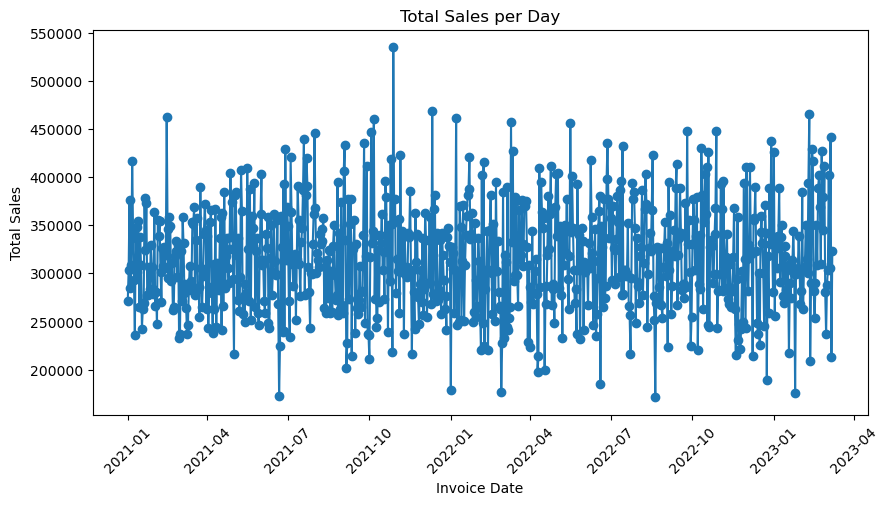

In [11]:

plt.figure(figsize=(10, 5))
sales_by_date.plot(kind='line', marker='o')
plt.title('Total Sales per Day')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.show()

Create a table similar to a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth. You may represent them as just 1, 2, and so forth as long as it's clear).

In [12]:
data_with_age = data_with_age.dropna(subset=['age'])

data_with_age['age_decade_range'] = (
    (data_with_age['age'] // 10 * 10).astype(int).astype(str) + '-' +
    ((data_with_age['age'] // 10 * 10 + 9).astype(int).astype(str))
)


data_with_age['total'] = data_with_age['quantity'] * data_with_age['price']


pivot_table = pd.pivot_table(
    data_with_age,
    values='total',
    index=['category','age_decade_range'],
    aggfunc='sum',
    fill_value=0
)

pd.set_option("display.max_rows",None)

print("Pivot Table: Sales by Category and Decade Age Group")
print(pivot_table)


Pivot Table: Sales by Category and Decade Age Group
                                        total
category        age_decade_range             
Books           10-19                12635.10
                20-29                77007.45
                30-39                83446.20
                40-49                86173.20
                50-59                75204.60
                60-69                80658.60
                70-79                55418.70
                80-89                26330.70
Clothing        10-19              1893504.80
                20-29             10107594.64
                30-39             11217890.64
                40-49             11233194.72
                50-59             10461689.04
                60-69             10607828.00
                70-79              7691950.64
                80-89              4479894.32
Cosmetics       10-19               110757.84
                20-29               594205.24
                30-39       